In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss
import category_encoders as ce
from sklearn.neural_network import MLPRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import silhouette_score
from scipy.stats import gaussian_kde
# from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
# from scipy.stats import zscore
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, log_loss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import entropy
from sklearn.metrics import precision_recall_curve
from sklearn.manifold import TSNE
from category_encoders import TargetEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tqdm import tqdm
from category_encoders import TargetEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import f_classif
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import FunctionTransformer
from scipy.sparse import hstack, csr_matrix
from category_encoders import CountEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy import sparse
from scipy.optimize import minimize
# from keras.callbacks import ReduceLROnPlateau
# from sklearn.ensemble import VotingAnomalyDetector
from sklearn.mixture import GaussianMixture
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import networkx as nx
from networkx.algorithms import community

In [15]:
df = pd.read_csv("DATA.csv", sep=';')

In [3]:
def preprocess_unsupervised(df):
    df = df.copy()

    all_ordinal_cols = ['full_date', 'lib_jour', 'lib_mois', 'Birth_date', 'Activation_Date',
                        'First_Call_Date', 'Last_Call_Date', 'status_date', 'Document_Validation_Date',
                        'DOC_SCN_DT']
    ordinal_cols = [col for col in all_ordinal_cols if col in df.columns]
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    counter_cols = [col for col in cat_cols if col not in ordinal_cols]

    # Numérique
    num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    df_num = pd.DataFrame(num_pipe.fit_transform(df[num_cols]), columns=num_cols, index=df.index).astype(np.float32)

    # Ordinal
    if ordinal_cols:
        ordinal_pipe = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ])
        df_ord = pd.DataFrame(ordinal_pipe.fit_transform(df[ordinal_cols]), columns=ordinal_cols, index=df.index).astype(np.float32)
    else:
        df_ord = pd.DataFrame(index=df.index)

    # Count
    if counter_cols:
        count_pipe = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', ce.CountEncoder())
        ])
        df_count = pd.DataFrame(count_pipe.fit_transform(df[counter_cols]), columns=counter_cols, index=df.index)
        df_count = np.log1p(df_count).astype(np.float32)  # sécurisation
    else:
        df_count = pd.DataFrame(index=df.index)

    df_processed = pd.concat([df_num, df_ord, df_count], axis=1)

    # Nettoyage final
    df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_processed.fillna(0, inplace=True)

    return df_processed


In [ ]:
df2 = pd.read_csv("DATA2.csv", sep=';', encoding='latin1')


types = df2.dtypes

cust_id               int64
nin                  object
ICC                  object
ID_doc               object
pdv_sk                int64
                     ...   
minor_ok            float64
cn_valid            float64
ocr_violation         int64
Id_operation          int64
type_d_opeartion     object
Length: 74, dtype: object

In [34]:
# Donne un DataFrame avec nom + type
df_types = pd.DataFrame(df.dtypes, columns=['dtype']).reset_index()
df_types.columns = ['column', 'dtype']
print(df_types.to_string(index=False))


                   column          dtype
                      nin         object
                   status         object
              status_date         object
               Birth_date         object
                  age_sub          int64
                   Gender         object
                  id_type         object
        subscription_type        float32
           tarrif_profile         object
                 type_sim         object
          Activation_Date         object
          First_Call_Date         object
           Last_Call_Date         object
                   ID_doc        float32
   Document_Validation_2G         object
   Document_Validation_3G         object
   Document_Validation_4G         object
         Document_stamped         object
   document_scaned_status         object
 Document_Validation_Date         object
               DOC_SCN_DT         object
                   pdv_sk          int64
                   PoS_ID         object
              DO

In [4]:
# ----- Isolation Forest Modifié pour Silhouette Score -----
class IsolationTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.tree = None
    @staticmethod
    def _c(n):
        if n <= 1: 
            return 0
        return 2 * (np.log(n - 1) + 0.5772) - (2 * (n - 1) / n)
    def fit(self, X, depth=0):
        if depth >= self.max_depth or len(X) <= 1:
            return {"size": len(X)}
        n_features = X.shape[1]
        feature = np.random.randint(0, n_features)
        min_val, max_val = np.min(X.iloc[:, feature]), np.max(X.iloc[:, feature])
        if min_val == max_val:
            return {"size": len(X)}
        split = np.random.uniform(min_val, max_val)
        left = X[X.iloc[:, feature] < split]
        right = X[X.iloc[:, feature] >= split]

        return {
            "feature": feature,
            "split": split,
            "left": self.fit(left, depth + 1),
            "right": self.fit(right, depth + 1)
        }
    
    def path_length(self, x, node=None, depth=0):
        if node is None:
            node = self.tree
        if "size" in node:
            return depth + self._c(node["size"])
        
        # Make sure we don't try to access non-existent features
        if node["feature"] >= len(x):
            return depth + self._c(1)  # Return a base case if feature is out of bounds
            
        value = x[node["feature"]]

        if value < node["split"]:
            return self.path_length(x, node["left"], depth + 1)
        else:
            return self.path_length(x, node["right"], depth + 1)
    

class IsolationForestScratch:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.X = None
        self.threshold = None
        self.scores = None
        self.contamination = 0.05  # Default contamination rate
    

    def anomaly_score(self, X=None):
        X = self.X if X is None else (X.values if isinstance(X, pd.DataFrame) else X)
        scores = []
        
        for i in range(len(X)):
            x = X[i]
            if isinstance(x, pd.Series):  # Convert Series to numpy array if needed
                x = x.values
                
            lengths = [t.path_length(x) for t in self.trees]
            avg = np.mean(lengths)
            score = 2 ** (-avg / IsolationTree._c(len(self.X)))  # Call through IsolationTree
            scores.append(score)
        return np.array(scores)
    def fit(self, X):
        # Convert to numpy array and ensure 2D
        self.X = np.asarray(X)
        if len(self.X.shape) == 1:
            self.X = self.X.reshape(-1, 1)
            
        height_limit = int(np.ceil(np.log2(len(self.X))))
        self.trees = []
        
        for _ in range(self.n_trees):
            sample_idx = np.random.choice(len(self.X), len(self.X) // 2, replace=False)
            sample = self.X[sample_idx]  # Use numpy array directly
            tree = IsolationTree(self.max_depth or height_limit)
            tree.tree = tree.fit(pd.DataFrame(sample))  # Convert to DataFrame only for the tree fitting
            self.trees.append(tree)
        
        # Calculate threshold based on contamination
        scores = self.anomaly_score()
        self.threshold = np.percentile(scores, 100 * (1 - self.contamination))
    
    def get_distance_matrix(self):
        """Retourne une matrice de distance basée sur les scores d'anomalie"""
        scores = self.anomaly_score()
        return cdist(scores.reshape(-1, 1), scores.reshape(-1, 1))
    
    def get_cluster_labels(self, X, threshold=None):
        """
        Returns cluster labels (0=normal, 1=anomaly) based on anomaly scores
        If no threshold is provided, uses the one calculated during fit()
        """
        scores = self.anomaly_score(X)
        threshold = threshold or self.threshold
        
        if threshold is None:
            raise ValueError("Threshold not set. Call fit() first or provide a threshold.")
            
        return (scores > threshold).astype(int)


# ----- LOF Modifié pour Silhouette Score -----
class LOF:
    def __init__(self, k=10):
        self.k = k
        self.X = None
        self.distances = None
        self.threshold = 1.5 

    def fit(self, X, contamination=0.05):
        self.X = X.values if isinstance(X, pd.DataFrame) else X
        self.distances = cdist(self.X, self.X)
        
        # Calculate threshold based on contamination
        scores = self.anomaly_score()
        self.threshold = np.percentile(scores, 100 * (1 - contamination))

    def _reach_dist(self, i, j):
        dist = self.distances[i, j]
        k_dist_j = np.partition(self.distances[j], self.k)[self.k]
        return max(dist, k_dist_j)

    def _lrd(self, i):
        neighbors = np.argsort(self.distances[i])[1:self.k+1]
        reach_dists = [self._reach_dist(i, j) for j in neighbors]
        return 1 / (np.mean(reach_dists) + 1e-10)

    def anomaly_score(self, X=None):
        if X is None:
            X = self.X
        else:
            X = X.values if isinstance(X, pd.DataFrame) else X
            distances = cdist(X, self.X)
        
        lrd_scores_train = [self._lrd(i) for i in range(len(self.X))]
        scores = []
        
        for i in range(len(X)):
            if X is self.X:
                neighbors = np.argsort(self.distances[i])[1:self.k+1]
            else:
                neighbors = np.argsort(distances[i])[:self.k]
            
            lrd_x = 1 / (np.mean([
                max(distances[i][j] if X is not self.X else self.distances[i][j], 
                np.partition(self.distances[j], self.k)[self.k])
                for j in neighbors
            ]) + 1e-10)
            
            ratios = [lrd_scores_train[j] / lrd_x for j in neighbors]
            scores.append(np.mean(ratios))
        
        return np.array(scores)
        
    
    def get_distance_matrix(self):
        """Retourne la matrice de distance originale"""
        return self.distances
    
    def get_cluster_labels(self, X, threshold=None):
        """Return labels for input data X"""
        scores = self.anomaly_score(X)
        threshold = threshold or self.threshold
        return (scores > threshold).astype(int)




# ----- One-Class SVM Simplifié -----
class OneClassSVM_RBF:
    def __init__(self, gamma=0.1):
        self.gamma = gamma

    def fit(self, X):
        self.X_train = X
        self.kernel = self._rbf_kernel(X, X)

    def _rbf_kernel(self, X1, X2):
        sq_dists = cdist(X1, X2, 'sqeuclidean')
        return np.exp(-self.gamma * sq_dists)

    def decision_function(self, X):
        K = self._rbf_kernel(X, self.X_train)
        return np.mean(K, axis=1)

    def anomaly_score(self, X):
        return -self.decision_function(X)

#------Autoencoder------
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z), z

    
    def fit(self, X):
        # === 1. Vérification et conversion des données ===
        if isinstance(X, pd.DataFrame):
            X = X.values.astype(np.float32)
        elif not isinstance(X, np.ndarray):
            raise ValueError("Input must be DataFrame or numpy array")
        
        # === 2. Initialisation du modèle ===
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        
        X_tensor = torch.FloatTensor(X).to(device)
        dataset = TensorDataset(X_tensor)
        loader = DataLoader(dataset, batch_size=64, shuffle=True)
        
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        
        # === 3. Entraînement ===
        self.train()
        for epoch in range(30):
            epoch_loss = 0
            for batch in loader:
                x_batch = batch[0]
                optimizer.zero_grad()
                x_recon, _ = self(x_batch)
                loss = criterion(x_recon, x_batch)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            if epoch % 10 == 0:
                avg_loss = epoch_loss / len(loader)
                print(f"Epoch {epoch} - Loss: {avg_loss:.4f}")
        
        # === 4. Encodage dans l'espace latent ===
        with torch.no_grad():
            self.eval()
            _, latent = self(X_tensor)
            latent_np = latent.cpu().numpy()
        
        # === 5. Clustering ===
        kmeans = KMeans(n_clusters=2, random_state=42)
        y_pred = kmeans.fit_predict(latent_np)
        print(f" Kmeans Silhouette Score: {silhouette_score(latent_np, y_pred):.3f}")
        # LOF
        lof = LOF(k=20)
        lof.fit(latent_np)
        lof_scores = lof.anomaly_score()
        lof_labels = lof.get_cluster_labels(pd.DataFrame(latent_np))
        print(f"LOF Silhouette Score: {silhouette_score(lof.get_distance_matrix(), lof_labels, metric='precomputed'):.3f}")
        
        # Isolation Forest
        iso_forest = IsolationForestScratch(n_trees=100)
        iso_forest.fit(pd.DataFrame(latent_np))
        iso_scores = iso_forest.anomaly_score(pd.DataFrame(latent_np))
        iso_labels = iso_forest.get_cluster_labels(pd.DataFrame(latent_np))
        print(f"Isolation Forest Silhouette Score: {silhouette_score(iso_forest.get_distance_matrix(), iso_labels, metric='precomputed'):.3f}")
        self.latent_np = latent_np
        self.lof = lof
        self.iforest = iso_forest
        self.lof_labels = lof_labels
        self.iso_labels = iso_labels
        return {
            'latent': pd.DataFrame(latent_np),
            'cluster_labels': y_pred,
            'lof_scores': lof_scores,
            'iso_scores': iso_scores,
            'iso_labels': iso_labels,
            'lof_labels': lof_labels
        }
    def encode(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values.astype(np.float32)
        elif not isinstance(X, np.ndarray):
            raise ValueError("Input must be DataFrame or numpy array")

        self.eval()
        device = next(self.parameters()).device

        with torch.no_grad():
            X_tensor = torch.FloatTensor(X).to(device)
            latent = self.encoder(X_tensor)
            return latent.cpu().numpy()

    def reconstruct(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values.astype(np.float32)

        self.eval()
        device = next(self.parameters()).device
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X).to(device)
            X_recon = self.decoder(self.encoder(X_tensor))
            return X_recon.cpu().numpy()

#--------META MODELE------
class BayesianOrdinalEncoder:
    def __init__(self, cols):
        self.cols = cols
        self.encoder = None

    def fit_transform(self, X, y):
        X_ = X.copy()
        self.encoder = ce.LeaveOneOutEncoder(cols=self.cols, random_state=42, sigma=0.1)
        return self.encoder.fit_transform(X_, y)

    def transform(self, X):
        X_ = X.copy()
        return self.encoder.transform(X_)
class ShrinkageBoostingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5, stack_model=None, fast_mode=True):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.tree_weights = []
        self.scaler = StandardScaler()
        self.encoder = None
        
        self.fast_mode = fast_mode
        
        if stack_model is None:
            from sklearn.ensemble import RandomForestClassifier
            self.stack_model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:
            self.stack_model = stack_model

    def _preprocess(self, X):
        X = X.copy()
        for col in X.columns:
            col_str = str(col)
            if 'date' in col_str.lower():
                try:
                    X[col] = pd.to_datetime(X[col], errors='coerce').astype('int64') // 10**9
                except Exception:
                    pass
        
        for col in X.columns:
            if X[col].dtype == 'object':
                X[col] = X[col].fillna('missing')
            else:
                X[col] = X[col].fillna(X[col].median())
        return X

    def fit(self, X, y):
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)

        cat_cols = X.select_dtypes(include='object').columns.tolist()
        if cat_cols:
            self.encoder = BayesianOrdinalEncoder(cols=cat_cols)
            X = self.encoder.fit_transform(X, y)

        self.feature_names_ = X.columns.tolist()

        X = pd.DataFrame(self.scaler.fit_transform(X), columns=X.columns)

        F = np.zeros(len(y))
        self.trees = []
        self.tree_weights = []

        for i in range(self.n_estimators):
            p = 1 / (1 + np.exp(-F))
            grad = y - p
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, grad)

            pred = tree.predict(X)
            delta = self.learning_rate * pred
            F += delta

            ll = log_loss(y, 1 / (1 + np.exp(-F)))
            weight = 1 / (ll + 1e-5)
            self.trees.append(tree)
            self.tree_weights.append(weight)

        stacked_preds = self._get_tree_outputs(X)
        if self.stack_model is None:
            from catboost import CatBoostClassifier
            self.stack_model = CatBoostClassifier(
                iterations=50,
                learning_rate=0.1,
                depth=4,
                verbose=0,
                random_seed=42,
                task_type='GPU' if self.fast_mode else 'CPU'
            )
        # Fit le stack model une seule fois
        self.stack_model.fit(stacked_preds, y)

        # Calibration des probabilités : "cv='prefit'" car CatBoost est déjà entraîné
        # self.stack_model = CalibratedClassifierCV(self.stack_model, method="sigmoid", cv="prefit")

        # # Fit du calibrateur uniquement (pas le modèle CatBoost)
        # self.stack_model.fit(stacked_preds, y)

    def _get_tree_outputs(self, X):
        outputs = [tree.predict(X) * w for tree, w in zip(self.trees, self.tree_weights)]
        return np.vstack(outputs).T

    def predict_proba(self, X):
        X = pd.DataFrame(X).reset_index(drop=True)
        X = self._preprocess(X)
        if self.encoder:
            X = self.encoder.transform(X)

        X = pd.DataFrame(self.scaler.transform(X), columns=self.feature_names_)
        stacked_preds = self._get_tree_outputs(X)
        return self.stack_model.predict_proba(stacked_preds)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [5]:
class AnomalyDetector:
    def __init__(self, autoencoder, contamination=0.05, features=None):
        """
        autoencoder: module PyTorch avec fit, encode, predict
        meta_model: modèle scikit-learn compatible (fit, predict, predict_proba)
        contamination: pour seuil des erreurs de reconstruction
        features: liste des colonnes à utiliser (subset de X.columns)
        """
        self.autoencoder = autoencoder
        self.meta_model = ShrinkageBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, stack_model=None, fast_mode=True)
        self.contamination = contamination
        self.features = features
        self.fit_outputs = None
    def fit(self, X):
        if self.features:
            X = X[self.features]

        self.fit_outputs = self.autoencoder.fit(X)
        
        lof_labels = self.autoencoder.lof_labels
        iso_labels = self.autoencoder.iso_labels

        X_np = X.values.astype(np.float32) if isinstance(X, pd.DataFrame) else X
        recon = self.autoencoder.reconstruct(X_np)

        ae_errors = np.mean((X_np - recon) ** 2, axis=1)
        ae_thresh = np.percentile(ae_errors, 100 * (1 - self.contamination))
        ae_labels = (ae_errors > ae_thresh).astype(int)

        df_meta = pd.DataFrame({
            "ae_label": ae_labels,
            "lof_label": lof_labels,
            "iso_label": iso_labels
        })

        df_meta["meta_label"] = (df_meta[["ae_label", "lof_label", "iso_label"]].sum(axis=1) >= 2).astype(int)

        self.meta_model.fit(df_meta[["ae_label", "lof_label", "iso_label"]], df_meta["meta_label"])

    def predict(self, X):
        if self.features:
            X = X[self.features]

        X_np = X.values.astype(np.float32) if isinstance(X, pd.DataFrame) else X
        recon = self.autoencoder.reconstruct(X_np)

        ae_errors = np.mean((X_np - recon) ** 2, axis=1)
        ae_thresh = np.percentile(ae_errors, 100 * (1 - self.contamination))
        ae_labels = (ae_errors > ae_thresh).astype(int)

        latent = self.autoencoder.encode(X_np)
        lof_labels = self.autoencoder.lof.get_cluster_labels(pd.DataFrame(latent))
        iso_labels = self.autoencoder.iforest.get_cluster_labels(pd.DataFrame(latent))

        df_pred = pd.DataFrame({
            "ae_label": ae_labels,
            "lof_label": lof_labels,
            "iso_label": iso_labels
        })

        return self.meta_model.predict(df_pred)

    def predict_proba(self, X):
        if self.features:
            X = X[self.features]

        X_np = X.values.astype(np.float32) if isinstance(X, pd.DataFrame) else X
        recon = self.autoencoder.reconstruct(X_np)

        ae_errors = np.mean((X_np - recon) ** 2, axis=1)
        ae_thresh = np.percentile(ae_errors, 100 * (1 - self.contamination))
        ae_labels = (ae_errors > ae_thresh).astype(int)

        latent = self.autoencoder.encode(X_np)
        lof_labels = self.autoencoder.lof.get_cluster_labels(pd.DataFrame(latent))
        iso_labels = self.autoencoder.iforest.get_cluster_labels(pd.DataFrame(latent))

        df_pred = pd.DataFrame({
            "ae_label": ae_labels,
            "lof_label": lof_labels,
            "iso_label": iso_labels
        })

        return self.meta_model.predict_proba(df_pred)
    def evaluate_unsupervised(self, X):
        """
        Évalue le métamodèle sans labels, à l'aide de critères non supervisés.
        Affiche :
        - Score silhouette (séparation des classes dans l'espace latent)
        - Taux de désaccord avec les prédicteurs de base
        - Répartition des prédictions
        - Erreur de reconstruction moyenne par classe
        """

        if self.features:
            X = X[self.features]

        X_np = X.values.astype(np.float32) if isinstance(X, pd.DataFrame) else X
        recon = self.autoencoder.reconstruct(X_np)
        ae_errors = np.mean((X_np - recon) ** 2, axis=1)
        ae_thresh = np.percentile(ae_errors, 100 * (1 - self.contamination))
        ae_labels = (ae_errors > ae_thresh).astype(int)

        latent = self.autoencoder.encode(X_np)
        lof_labels = self.autoencoder.lof.get_cluster_labels(pd.DataFrame(latent))
        iso_labels = self.autoencoder.iforest.get_cluster_labels(pd.DataFrame(latent))

        df_meta = pd.DataFrame({
            "ae_label": ae_labels,
            "lof_label": lof_labels,
            "iso_label": iso_labels,
            "recon_error": ae_errors
        })

        df_meta["meta_pred"] = self.meta_model.predict(df_meta[["ae_label", "lof_label", "iso_label"]])

        # Score de silhouette sur l’espace latent
        try:
            sil_score = silhouette_score(latent, df_meta["meta_pred"])
            print(f"Silhouette score (latents, selon prédiction métamodèle) : {sil_score:.4f}")
        except Exception as e:
            print("Silhouette score non calculé :", str(e))

        # Taux moyen de désaccord entre les modèles de base et le métamodèle
        df_meta["disagreement"] = (
            (df_meta["meta_pred"] != df_meta["ae_label"]).astype(int) +
            (df_meta["meta_pred"] != df_meta["lof_label"]).astype(int) +
            (df_meta["meta_pred"] != df_meta["iso_label"]).astype(int)
        )
        mean_disagreement = df_meta["disagreement"].mean()
        print(f"Taux moyen de désaccord (0 à 3) avec les modèles de base : {mean_disagreement:.4f}")

      

        # Erreurs de reconstruction par classe prédite
        print("\nStatistiques d'erreur de reconstruction selon la classe prédite :")
        print(df_meta.groupby("meta_pred")["recon_error"].describe())


        


In [6]:
class AnomalyExplainer:
    def __init__(self, features, preprocessor=None):
        self.features = features
        self.stats_ = {}
        self.preprocessor = preprocessor
        self.original_X_train = None  # nouvelle variable

    def fit(self, X_train_original):
        """
        Calcule les stats de référence sur les données normales non encodées.
        """
        self.original_X_train = X_train_original[self.features].copy()

        for col in self.features:
            if np.issubdtype(self.original_X_train[col].dtype, np.number):
                q1 = self.original_X_train[col].quantile(0.25)
                q3 = self.original_X_train[col].quantile(0.75)
                iqr = q3 - q1
                median = self.original_X_train[col].median()
                self.stats_[col] = {
                    "type": "numeric",
                    "median": median,
                    "iqr": iqr,
                    "q1": q1,
                    "q3": q3
                }
            else:
                top_val = self.original_X_train[col].mode()[0]
                freq = self.original_X_train[col].value_counts(normalize=True).get(top_val, 0)
                self.stats_[col] = {
                    "type": "categorical",
                    "top_value": top_val,
                    "frequency": freq
                }

    def explain(self, X_anomalies_encoded, X_anomalies_original, top_k=3):
        """
        Donne une explication avec les valeurs réelles, même si les données sont encodées.
        """
        X_anomalies_encoded=preprocess_unsupervised(X_anomalies_encoded)
        results = []

        for idx in X_anomalies_encoded.index:
            row_encoded = X_anomalies_encoded.loc[idx]
            row_original = X_anomalies_original.loc[idx]
            contribs = {}
            values = {}

            for col in self.features:
                val_original = row_original[col]
                val_encoded = row_encoded[col]
                stat = self.stats_.get(col)

                if stat["type"] == "numeric":
                    median = stat["median"]
                    iqr = stat["iqr"]
                    score = abs(val_original - median) / (iqr + 1e-8)
                    contribs[col] = score
                else:
                    score = 0 if val_original == stat["top_value"] else 1
                    contribs[col] = score

                values[col] = val_original

            top_features = sorted(contribs.items(), key=lambda x: x[1], reverse=True)[:top_k]
            formatted = [
                f"{col} = {values[col]} (score={contribs[col]:.2f})" for col, _ in top_features
            ]
            explanation = {
                "index": idx,
                "top_features": formatted
            }
            results.append(explanation)

        return results


In [7]:
class AnomalyExplainerV2:
    def __init__(self, X, detector, method='pca', k=20):
        """
        X : pd.DataFrame ou np.ndarray - Données complètes
        detector : instance entraînée de AnomalyDetector
        method : 'pca' ou 'umap' - Méthode de projection
        k : int - Nombre de voisins pour le contexte local
        """
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()
            self.X_raw = X.copy()
        else:
            self.feature_names = [f"feature_{i}" for i in range(X.shape[1])]
            self.X_raw = pd.DataFrame(X, columns=self.feature_names)

        self.detector = detector
        self.k = k
        self.method = method
        self.scaler = StandardScaler()
        self.X = self.scaler.fit_transform(self.X_raw)

        self.anomalies_idx = np.where(self.detector.predict(self.X_raw) == 1)[0]
        self.suspicion_scores = self.detector.predict_proba(self.X_raw)[:, 1]
        self.anomaly_profiles = None
        self.embedding = None

    def compute_projection(self):
        reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=42) if self.method == 'umap' else PCA(n_components=2)
        self.embedding = reducer.fit_transform(self.X)

    def explain_anomalies(self):
        self.compute_projection()
        profiles = []

        for idx in self.anomalies_idx:
            point = self.X[idx]
            distances = np.linalg.norm(self.X - point, axis=1)
            nearest_indices = np.argsort(distances)[1:self.k + 1]
            local_mean = self.X[nearest_indices].mean(axis=0)
            deviation = point - local_mean
            strong_dims = np.argsort(np.abs(deviation))[::-1][:3]

            profile = {
                'index': idx,
                'suspicion_score': self.suspicion_scores[idx],
                'top_contributors': [self.feature_names[i] for i in strong_dims],
                'deviation_vector': deviation[strong_dims],
                'deviation_values': {self.feature_names[i]: float(deviation[i]) for i in strong_dims},
                'real_values': {
                    self.feature_names[i]: self.X_raw.iloc[idx][self.feature_names[i]] for i in strong_dims
                },
                'neighbor_means': {
                    self.feature_names[i]: self.X_raw.iloc[nearest_indices][self.feature_names[i]].mean() for i in strong_dims
                }
            }
            profiles.append(profile)

        self.anomaly_profiles = profiles
        return profiles

    def plot_anomalies(self):
        if self.embedding is None:
            self.compute_projection()

        plt.figure(figsize=(10, 7))
        plt.scatter(self.embedding[:, 0], self.embedding[:, 1], c='lightgrey', s=20, label='Normaux')
        scores = np.array([self.suspicion_scores[i] for i in self.anomalies_idx])
        norm_scores = (scores - scores.min()) / (scores.max() - scores.min() + 1e-6)

        scatter = plt.scatter(self.embedding[self.anomalies_idx, 0],
                              self.embedding[self.anomalies_idx, 1],
                              c=norm_scores, cmap='coolwarm', s=60, edgecolor='k', label='Anomalies')

        plt.colorbar(scatter, label="Suspicion Score")
        plt.title("Projection des Données avec Anomalies")
        plt.legend()
        plt.tight_layout()
        plt.show()

    def generate_reports(self):
        if self.anomaly_profiles is None:
            self.explain_anomalies()

        print("=== RAPPORT D’ANOMALIES ===")
        for profile in sorted(self.anomaly_profiles, key=lambda x: -x['suspicion_score']):
            print(f"Anomalie #{profile['index']}:")
            print(f"  → Suspicion Score: {profile['suspicion_score']:.2f}")
            print(f"  → Variables en cause: {', '.join(profile['top_contributors'])}")
            print(f"  → Déviation relative: {profile['deviation_vector']}")
            print("-" * 50)


In [11]:
import joblib
import torch

def save_anomaly_model(anomaly_model, path_prefix="anomaly_detector"):
    # 1. Sauvegarder l'état du modèle PyTorch
    torch.save(autoencoder.state_dict(), f"{path_prefix}_autoencoder.pth")
    joblib.dump(autoencoder.lof, f"{path_prefix}_lof.pkl")
    joblib.dump(autoencoder.iforest, f"{path_prefix}_iforest.pkl")
    # 2. Sauvegarder le modèle ShrinkageBoostingClassifier
    joblib.dump(anomaly_model.meta_model, f"{path_prefix}_meta_model.pkl")

    # 3. Sauvegarder les paramètres du modèle
    joblib.dump({
        "contamination": anomaly_model.contamination,
        "features": anomaly_model.features
    }, f"{path_prefix}_params.pkl")

    print("Modèle sauvegardé avec succès.")


In [12]:
def load_anomaly_model(path_prefix="anomaly_detector", input_dim=10, latent_dim=16):
    # 1. Recréer l'autoencodeur vide et charger les poids
    autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
    autoencoder.load_state_dict(torch.load(f"{path_prefix}_autoencoder.pth"))
    autoencoder.lof = joblib.load(f"{path_prefix}_lof.pkl")
    autoencoder.iforest = joblib.load(f"{path_prefix}_iforest.pkl")
    autoencoder.eval()

    # 2. Recharger le modèle méta
    meta_model = joblib.load(f"{path_prefix}_meta_model.pkl")

    # 3. Recharger les paramètres
    params = joblib.load(f"{path_prefix}_params.pkl")

    # 4. Reconstruire l'objet AnomalyDetector
    model = AnomalyDetector(autoencoder=autoencoder, contamination=params["contamination"], features=params["features"])
    model.meta_model = meta_model

    print("Modèle chargé avec succès.")
    return model


In [8]:
selected_final=['doc_scan_avant_activation', 'subscription_type', 'cn_valid', 'DOK_SCN_USR', 'type_d_operation', 'BU', 'lib_mois', 'Province', 'ID_doc']


In [ ]:
'DOC_VAL_USR', 'status', 'Document_Validation_3G', 'ID_doc', 'doc_scan_avant_activation', 'Street', 'Document_Validation_4G', 'tarrif_profile', 'nin'

In [11]:

selected_final=['DOC_VAL_USR', 'status', 'Document_Validation_3G', 'ID_doc', 'doc_scan_avant_activation', 'Street', 'Document_Validation_4G', 'tarrif_profile', 'nin']
# data = df[selected_final].copy()
X_preprocessed= preprocess_unsupervised(df[selected_final])

df[selected_final] = X_preprocessed
input_dim = len(selected_final)
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=16)
# Séparation en train/test si tu veux valider
X_train, X_test = train_test_split(df[selected_final], test_size=0.2, random_state=42)

# Initialisation du modèle avec les features finales
anomaly_model = AnomalyDetector( autoencoder=autoencoder,contamination=0.05,features=selected_final) 

# Entraînement sur le train set
anomaly_model.fit(X_train)

# Prédiction sur le test set
# predictions = anomaly_model.predict(X_test)
predictions = anomaly_model.predict(X_test[selected_final])  # ou df[features]

# Affichage des résultats
print("Anomalies détectées dans le test set :", sum(predictions))
print("Total d'observations testées :", len(predictions))

# Pour analyse visuelle
X_test_result = X_test.copy()
X_test_result["anomaly"] = predictions
X_test_result.to_csv("anomalies_detected.csv", index=False)
X_test_result.head()


Epoch 0 - Loss: 0.0491
Epoch 10 - Loss: 0.0001
Epoch 20 - Loss: 0.0000
 Kmeans Silhouette Score: 1.000
LOF Silhouette Score: 0.999
Isolation Forest Silhouette Score: 1.000
Anomalies détectées dans le test set : 33
Total d'observations testées : 1289


,DOC_VAL_USR,status,Document_Validation_3G,ID_doc,doc_scan_avant_activation,Street,Document_Validation_4G,tarrif_profile,nin,anomaly
4623,0.054376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
233,0.054376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6004,0.054376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6127,0.054376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
907,0.054376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
# 1️⃣ Conserver un DataFrame original intact avant encodage
df_original = df.copy()

# 2️⃣ Sélectionner uniquement les colonnes à encoder pour le modèle
X_to_encode = df[selected_final].copy()

# 3️⃣ Encodage
X_preprocessed = preprocess_unsupervised(X_to_encode)

# 4️⃣ Split train/test basé sur les données encodées, mais index liés aux données originales
X_train, X_test = train_test_split(X_preprocessed, test_size=0.2, random_state=42)

# 5️⃣ Entraînement et prédictions
anomaly_model.fit(X_train)
predictions = anomaly_model.predict(X_test)

# 6️⃣ Récupérer toutes les colonnes originales associées au test set
X_test_original = df.loc[X_test.index].copy()
X_test_original["anomaly"] = predictions

# 7️⃣ Export complet avec toutes les colonnes originales intactes
X_test_original.to_csv("anomalies_detected_full_original.csv", index=False)

# 8️⃣ Export uniquement des anomalies détectées
df_anomalies_only = X_test_original[X_test_original["anomaly"] == 1]
df_anomalies_only.to_csv("anomalies_detected_original_only.csv", index=False)

# Vérification
print(f"Total anomalies détectées : {df_anomalies_only.shape[0]}")


Epoch 0 - Loss: 0.0946
Epoch 10 - Loss: 0.0000
Epoch 20 - Loss: 0.0000
 Kmeans Silhouette Score: 1.000
LOF Silhouette Score: 0.999
Isolation Forest Silhouette Score: 1.000
Total anomalies détectées : 33


In [17]:
X_test_original.columns

Index(['nin', 'status', 'status_date', 'Birth_date', 'age_sub', 'Gender',
       'id_type', 'subscription_type', 'tarrif_profile', 'type_sim',
       'Activation_Date', 'First_Call_Date', 'Last_Call_Date', 'ID_doc',
       'Document_Validation_2G', 'Document_Validation_3G',
       'Document_Validation_4G', 'Document_stamped', 'document_scaned_status',
       'Document_Validation_Date', 'DOC_SCN_DT', 'pdv_sk', 'PoS_ID',
       'DOC_VAL_USR', 'DOK_SCN_USR', 'BU', 'localisation_sk', 'Postal_ID',
       'Province', 'City', 'Street', 'id_date', 'full_date', 'year', 'mois',
       'lib_mois', 'jours', 'lib_jour', 'NIN_ok', 'DOB_ok', 'minor_ok',
       'cn_valid', 'similarity_score', 'ocr_violation', 'id_operation',
       'type_d_operation', 'similarity_score_bin', 'violation_reason',
       'temps_moyen_appel', 'temps_moyen_traitement', 'reactivite_client',
       'Revenue_Last_2_Months', 'Revenue_Last_12_Months', 'ARPU_Last_2_Months',
       'segment_value', 'client_haut_revenue', 'doc_sca

In [9]:
anomaly_model.evaluate_unsupervised(X_test)

Silhouette score (latents, selon prédiction métamodèle) : 0.9522
Taux moyen de désaccord (0 à 3) avec les modèles de base : 0.0116

Statistiques d'erreur de reconstruction selon la classe prédite :
            count          mean           std           min           25%  \
meta_pred                                                                   
0          1256.0  2.074548e-17  6.367606e-18  2.004569e-17  2.004569e-17   
1            33.0  2.749858e-16  1.259502e-16  1.341520e-16  1.788693e-16   

                    50%           75%           max  
meta_pred                                            
0          2.004569e-17  2.004569e-17  7.864080e-17  
1          2.914335e-16  2.914335e-16  5.720732e-16  


In [ ]:
# Si id_fact est bien présent dans X_test_result :
merged_df = df.merge(X_test_result[['id_fact', 'anomaly']], on='id_fact', how='left')

# 'anomaly' sera NaN pour les lignes non présentes dans X_test (i.e., le train)
merged_df['anomaly'] = merged_df['anomaly'].fillna(0).astype(int)

# Sauvegarde si besoin :
merged_df.to_csv("df_with_anomalies.csv", index=False)

# Vérification rapide :
merged_df.head()


In [14]:
# Sauvegarde
save_anomaly_model(anomaly_model, path_prefix="anomaly_detector")

# Rechargement
loaded_model = load_anomaly_model(path_prefix="anomaly_detector", input_dim=input_dim, latent_dim=16)

# Utilisation après chargement
predictions = loaded_model.predict(X_test[selected_final])


Modèle sauvegardé avec succès.


C:\Users\IMENE\AppData\Local\Temp\ipykernel_16780\2157438703.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load(f"{path_prefix}_autoe

Modèle chargé avec succès.


In [21]:
import plotly.express as px

In [ ]:

selected_final=['doc_scan_avant_activation', 'subscription_type', 'cn_valid', 'DOK_SCN_USR', 'type_d_operation', 'BU', 'lib_mois', 'Province', 'ID_doc']
# data = df[selected_final].copy()
X_preprocessed= preprocess_unsupervised(df[selected_final])

df[selected_final] = X_preprocessed
input_dim = len(selected_final)
autoencoder = Autoencoder(input_dim=input_dim, latent_dim=16)
# Séparation en train/test si tu veux valider
X_train, X_test = train_test_split(df[selected_final], test_size=0.2, random_state=42)

# Initialisation du modèle avec les features finales
anomaly_model = AnomalyDetector( autoencoder=autoencoder,contamination=0.05,features=selected_final) 

# Entraînement sur le train set
anomaly_model.fit(X_train)

# Prédiction sur le test set
# predictions = anomaly_model.predict(X_test)
predictions = anomaly_model.predict(X_test[selected_final])  # ou df[features]

# Affichage des résultats
print("Anomalies détectées dans le test set :", sum(predictions))
print("Total d'observations testées :", len(predictions))

# Pour analyse visuelle
X_test_result = X_test.copy()
X_test_result["anomaly"] = predictions
df_anomaly = X_test_result[X_test_result["anomaly"] == 1].to_csv("anomalies_detected.csv", index=False)
X_test_result.head()


Epoch 0 - Loss: 0.0899
Epoch 10 - Loss: 0.0001
Epoch 20 - Loss: 0.0004
 Kmeans Silhouette Score: 0.981
LOF Silhouette Score: 0.948
Isolation Forest Silhouette Score: 0.964
Anomalies détectées dans le test set : 48
Total d'observations testées : 1289


,doc_scan_avant_activation,subscription_type,cn_valid,DOK_SCN_USR,type_d_operation,BU,lib_mois,Province,ID_doc,anomaly
4623,0.054376,0.417333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
233,0.054376,0.417333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6004,0.054376,0.417333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6127,0.054376,0.417333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
907,0.054376,0.417333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
anomaly_model.evaluate_unsupervised(X_test)

Silhouette score (latents, selon prédiction métamodèle) : 0.6722
Taux moyen de désaccord (0 à 3) avec les modèles de base : 0.0442

Statistiques d'erreur de reconstruction selon la classe prédite :
            count          mean           std           min           25%  \
meta_pred                                                                   
0          1241.0  2.076497e-07  1.832897e-07  1.366576e-07  1.366576e-07   
1            48.0  1.294431e-03  4.337866e-03  1.366588e-07  1.366593e-07   

                    50%           75%           max  
meta_pred                                            
0          1.366576e-07  1.366576e-07  6.804920e-07  
1          1.366601e-07  1.366611e-07  1.553085e-02  


In [18]:
def create_top_frequent_values_plot(df_anomalies, column, top_n=10, df_original=None):
    """
    Affiche les top valeurs non encodées d'une colonne dans les anomalies.
    Si les données originales sont disponibles, elles sont utilisées.
    """
    if df_original is not None and column in df_original.columns:
        # Valeurs originales (non encodées)
        original_values = df_original.loc[df_anomalies.index, column]
    else:
        # Sinon fallback sur valeurs transformées (mais potentiellement encodées)
        original_values = df_anomalies[column]

    # Calcul des fréquences
    top_vals = original_values.value_counts().head(top_n).reset_index()
    top_vals.columns = ['value', 'count']

    fig = px.bar(
        top_vals,
        x='value',
        y='count',
        title=f"Top {top_n} valeurs non encodées de '{column}' dans les anomalies",
        labels={'value': column, 'count': 'Fréquence'},
        color='count',
        color_continuous_scale=px.colors.sequential.Viridis
    )

    fig.update_layout(
        xaxis_tickangle=-45,
        margin=dict(l=20, r=20, t=40, b=20)
    )

    return fig


In [19]:
anomaly_explainer= AnomalyExplainerV2(X=X_test[selected_final], detector=anomaly_model, method='UMAP', k=20)

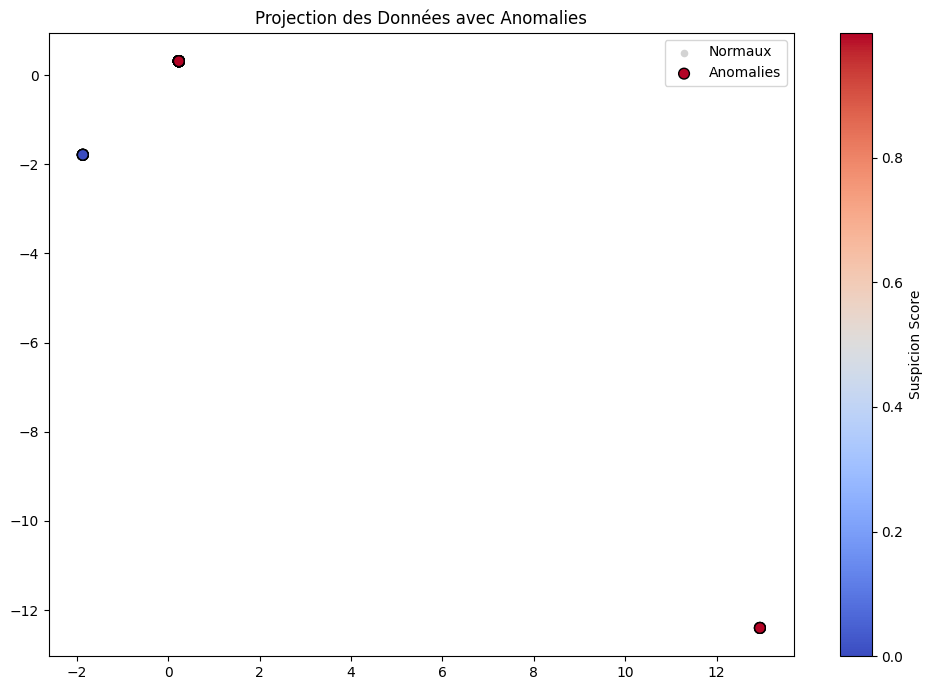

=== RAPPORT D’ANOMALIES ===
Anomalie #126:
  → Suspicion Score: 1.00
  → Variables en cause: subscription_type, doc_scan_avant_activation, ID_doc
  → Déviation relative: [2.9802322e-08 1.8626451e-08 0.0000000e+00]
--------------------------------------------------
Anomalie #127:
  → Suspicion Score: 1.00
  → Variables en cause: subscription_type, doc_scan_avant_activation, ID_doc
  → Déviation relative: [2.9802322e-08 1.8626451e-08 0.0000000e+00]
--------------------------------------------------
Anomalie #128:
  → Suspicion Score: 1.00
  → Variables en cause: subscription_type, doc_scan_avant_activation, ID_doc
  → Déviation relative: [2.9802322e-08 1.8626451e-08 0.0000000e+00]
--------------------------------------------------
Anomalie #238:
  → Suspicion Score: 1.00
  → Variables en cause: doc_scan_avant_activation, subscription_type, ID_doc
  → Déviation relative: [-1.5282356e+01  2.9802322e-08  0.0000000e+00]
--------------------------------------------------
Anomalie #255:
  → Su

In [28]:
anomaly_explainer.explain_anomalies()
anomaly_explainer.plot_anomalies()
anomaly_explainer.generate_reports()


In [22]:
import dash
from dash import dcc, html, Input, Output, State
from dash import dash_table
import dash_bootstrap_components as dbc
from dash.exceptions import PreventUpdate
import urllib.parse

# Initialisation de l'application Dash avec des pages multiples
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP], suppress_callback_exceptions=True)
anomalies_with_BU = df.loc[X_test_result[X_test_result['anomaly'] == 1].index]
# Identifier la BU la plus fréquente parmi les anomalies
top_BU = anomalies_with_BU['BU'].mode()[0]

# Filtrer uniquement les anomalies de cette BU
filtered_anomalies = anomalies_with_BU[anomalies_with_BU['BU'] == top_BU]
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')
# Colonnes numériques dans le DataFrame original
numeric_cols_original = df.select_dtypes(include=['number']).columns.tolist()

# Colonnes encodées dans X_test_result (souvent après transformation)
encoded_cols = X_test_result.columns.tolist()

# Colonnes numériques originales conservées (non transformées)
numeric_cols = [col for col in numeric_cols_original if col in encoded_cols]
# Récupérer les anomalies depuis le DataFrame original (non encodé)
anomaly_indices = X_test_result[X_test_result['anomaly'] == 1].index
anomalies = df.loc[anomaly_indices, ['full_date', 'BU', 'type_d_operation', 'violation_reason']]


def calculate_metrics(df, gle):
    metrics = {}
    
    # 1. Taux d'anomalies
    metrics['anomaly_rate'] = df['anomaly'].mean()
    
    # 2. Coût estimé
    metrics['estimated_cost'] = df['anomaly'].sum() * 10000  # Exemple de coût estimé par anomalie
    
    # 3. Segment à risque : BU non encodée
    if 'BU' in gle.columns:
        anomalies_idx = df[df['anomaly'] == 1].index
        gle_anomalies = gle.loc[anomalies_idx]

        bu_counts = gle_anomalies['BU'].value_counts()
        if not bu_counts.empty:
            top_bu = bu_counts.idxmax()
            metrics['top_risk_BU'] = top_bu
            metrics['BU_anomaly_rate'] = (gle.loc[gle['BU'] == top_bu].index.isin(anomalies_idx).sum()
                                          / (gle['BU'] == top_bu).sum())
        else:
            metrics['top_risk_BU'] = "Aucune anomalie"
            metrics['BU_anomaly_rate'] = 0
    else:
        metrics['top_risk_BU'] = "Colonne BU manquante"
        metrics['BU_anomaly_rate'] = 0
    
    # 4. Dernière détection
    
    if 'full_date' in gle.columns:
        try:
            # On extrait les indices des anomalies dans df
            anomaly_indices = df.index[df['anomaly'] == 1]

            # On récupère les dates correspondantes dans gle
            full_dates = gle.loc[anomaly_indices, 'full_date']

            # Conversion si nécessaire
            if not np.issubdtype(full_dates.dtype, np.datetime64):
                full_dates = pd.to_datetime(full_dates, errors='coerce')

            last_anomaly = full_dates.max()

            if pd.notnull(last_anomaly):
                metrics['last_anomaly_date'] = last_anomaly.strftime('%Y/%m/%d %H:%M:%S')
            else:
                metrics['last_anomaly_date'] = "Date invalide"
        except Exception as e:
            metrics['last_anomaly_date'] = f"Erreur : {str(e)}"


    else:
        metrics['last_anomaly_date'] = "Colonne date manquante"

    return metrics
X_test_result = X_test_result.copy()
X_test_result['full_date'] = df.loc[X_test_result.index, 'full_date']

# Convertir les dates en datetime
X_test_result['full_date'] = pd.to_datetime(X_test_result['full_date'], errors='coerce')

# Construire la figure
fig_date = px.line(
    X_test_result.groupby(X_test_result['full_date'].dt.date)['anomaly'].mean().reset_index(),
    x='full_date',
    y='anomaly',
    labels={'full_date': 'Date', 'anomaly': 'Taux d\'anomalies'},
    title="Taux d'anomalies par jour"
)
# X_test_result = 
# Calcul initial des métriques
metrics = calculate_metrics(X_test_result,df)
# Layout principal avec navigation
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    
    # Barre de navigation
    dbc.NavbarSimple(
        children=[
            dbc.NavItem(dbc.NavLink("Tableau de bord", href="/")),
            dbc.NavItem(dbc.NavLink("Analyse des anomalies", href="/anomaly-analysis")),
            dbc.NavItem(dbc.NavLink("Les KPIs", href="/frequent-values")),
        ],
        brand="Dashboard de Détection d'Anomalies",
        brand_href="/",
        color="danger",
        dark=True,
        className="mb-4"
    ),
    
    # Contenu des pages
    html.Div(id='page-content')
])


home_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Tableau de Bord", className='text-center mb-4'), width=12)
    ]),

    dbc.Row([
        # Colonne de gauche (Résumé + Répartition)
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Résumé des Anomalies"),
                dbc.CardBody([
                    html.H4("Anomalies détectées", className="card-title"),
                    html.P(id='anomaly-count', className="display-4"),
                    html.P(f"Sur {len(X_test)} observations testées", className="card-text")
                ])
            ], className='mb-4'),

            dbc.Card([
                dbc.CardHeader("Répartition des Anomalies"),
                dbc.CardBody([
                    dcc.Graph(id='anomaly-distribution')
                ])
            ])
        ], width=4),

        # Colonne de droite (Tableau)
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Détail des Anomalies"),
                dbc.CardBody([
                    dash_table.DataTable(
                        id='anomaly-table',
                        columns=[{"name": i, "id": i} for i in anomalies.columns],
                        data=anomalies.to_dict('records'),
                        filter_action="native",
                        sort_action="native",
                        page_size=10,
                        style_table={'overflowX': 'auto'}
                    )
                ])
            ])
        ], width=8)
    ]),


    # Nouvelle section pour la segmentation des anomalies
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Segmentation des Anomalies"),
                dbc.CardBody([
                    html.Label("Sélectionnez un attribut pour segmenter les anomalies:"),
                    dcc.Dropdown(
                        id='segmentation-attribute',
                        options=[
                            {'label': 'Âge du souscripteur', 'value': 'age_sub'},
                            {'label': 'Business Unit', 'value': 'BU'},
                            {'label': 'Wilaya', 'value': 'Province'},
                            {'label': 'Jour de la semaine', 'value': 'lib_jour'},
                            {'label': 'Mois', 'value': 'full_date'},  # Assurez-vous que cette colonne existe
                        ],
                        value='age_sub',
                        clearable=False
                    ),
                    dcc.Graph(id='anomaly-segmentation-plot')
                ])
            ], className='mt-4')
        ], width=12)
    ]),
    
    # Bouton pour aller à l'analyse détaillée
    dbc.Row([
        dbc.Col(
            dbc.Button(
                "Voir l'analyse détaillée des anomalies", 
                color="danger", 
                href="/anomaly-analysis",
                className="mt-4"
            ),
            width=12, className="text-center"
        )
    ])
], fluid=True)
# Layout de la page d'analyse des anomalies
anomaly_analysis_layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Analyse Détailée des Anomalies", className='text-center mb-4'), width=12)
    ]),
    
    # Analyse des Features Importantes
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Contribution des Variables aux Anomalies"),
                dbc.CardBody([
                    dcc.Graph(id='feature-importance')
                ])
            ])
        ], width=12)
    ]),
    
    # Détails des Anomalies
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Détails des Anomalies Détectées"),
                dbc.CardBody([
                    html.Label("Sélectionnez une anomalie pour plus de détails:"),
                    dcc.Dropdown(
                        id='anomaly-selector',
                        options=[{'label': f"Anomalie {i+1}", 'value': idx} 
                                for i, idx in enumerate(anomaly_explainer.anomalies_idx)],
                        value=None
                    ),
                    html.Div(id='anomaly-details', className='mt-3')
                ])
            ])
        ], width=12)
    ], className='mt-4'),
    
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Analyse Comparative"),
                dbc.CardBody([
                    dbc.Row([
                        dbc.Col([
                            html.Label("Variable X:"),
                            dcc.Dropdown(
                                id='scatter-x',
                                options=[{'label': col, 'value': col} for col in numeric_cols],
                                value=numeric_cols[0]
                            )
                        ], md=6),
                        dbc.Col([
                            html.Label("Variable Y:"),
                            dcc.Dropdown(
                                id='scatter-y',
                                options=[{'label': col, 'value': col} for col in numeric_cols],
                                value=numeric_cols[1]
                            )
                        ], md=6)
                    ]),
                    dcc.Graph(id='comparative-scatter')
                ])
            ])
        ])
    ]),
    # Bouton de retour
    dbc.Row([
        dbc.Col(
            dbc.Button(
                "Retour au tableau de bord", 
                color="secondary", 
                href="/",
                className="mt-4"
            ),
            width=12, className="text-center"
        )
    ])
], fluid=True)
anomalies = X_test_result[X_test_result['anomaly'] == 1]
# Layout de la page des valeurs fréquentes
frequent_values_layout = dbc.Container([
    
    dbc.Row([
        dbc.Col(html.H1("KPIs", className='text-center my-4'), width=12)
    ]),
    
    # Cartes de métriques
    dbc.Row([
        dbc.Col(
            dbc.Card([
                dbc.CardHeader("Taux d'Anomalies"),
                dbc.CardBody([
                    html.H4(f"{metrics['anomaly_rate']:.2%}", className="card-title text-primary"),
                    html.Small(f"Sur {len(X_test_result)} observations", className="text-muted"),
                    dbc.Progress(
                        value=metrics['anomaly_rate']*100, 
                        max=100, 
                        color="primary", 
                        striped=True,
                        className="mt-2"
                    )
                ])
            ]), md=3
        ),
        dbc.Col(
            dbc.Card([
                dbc.CardHeader("Coût Estimé"),
                dbc.CardBody([
                    html.H4(f"{metrics['estimated_cost']:,.0f} DZD", className="card-title text-warning"),
                    # html.Small(f"Pour {df['anomaly'].sum()} anomalies", className="text-muted")
                ])
            ]), md=3
        ),
        dbc.Col(
            dbc.Card([
                dbc.CardHeader("BU la Plus à Risque"),
                dbc.CardBody([
                    html.H4(metrics['top_risk_BU'], className="card-title text-info"),
                    html.Small(f"Taux: {metrics['BU_anomaly_rate']:.2%}", className="text-muted")
                ])
            ]), md=3
        ),
        dbc.Col(
            dbc.Card([
                dbc.CardHeader("Dernière Anomalie"),
                dbc.CardBody([
                    html.H4(metrics['last_anomaly_date'], className="card-title"),
                    html.Small("Détectée le", className="text-muted")
                ])
            ]), md=3
        )
    ], className="mb-4"),
    
    # Graphiques
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Évolution Temporelle des Anomalies"),
                dbc.CardBody([
                    dcc.Graph(figure=fig_date)
                ])
            ])
        ], md=6),
        dbc.Col([
            html.Div([
                dbc.Label("Sélectionnez une BU :"),
                dcc.Dropdown(
                    id='bu-selector',
                    options=[{'label': bu, 'value': bu} for bu in df['BU'].dropna().unique()],
                    value=df['BU'].mode()[0],  # valeur par défaut
                    clearable=False
                )
            ]),

            dbc.Card([
                dbc.CardHeader("Répartition des anomalies par utilisateur"),
                dbc.CardBody([
                    dcc.Graph(id='dok-usr-pie')
                ])
            ])

        ], md=6)

    ]),
    
    # Intervalle de rafraîchissement (optionnel)
    dcc.Interval(id='refresh-interval', interval=60*1000, n_intervals=0)
])# Callback pour changer de page
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/':
        return home_layout
    elif pathname == '/anomaly-analysis':
        return anomaly_analysis_layout
    elif pathname == '/frequent-values':
        return frequent_values_layout
    else:
        return home_layout  # Page par défaut

# Callbacks pour l'interactivité

@app.callback(
    Output('anomaly-count', 'children'),
    Input('anomaly-distribution', 'figure')
)
def update_anomaly_count(_):
    return f"{sum(predictions)}"

@app.callback(
    Output('anomaly-distribution', 'figure'),
    Input('anomaly-distribution', 'id')
)
def update_anomaly_distribution(_):
    fig = px.pie(
        names=['Normales', 'Anomalies'],
        values=[len(predictions)-sum(predictions), sum(predictions)],
        hole=0.4,
        color_discrete_sequence=['#4da7ff', '#ff8700']
    )
    fig.update_layout(showlegend=False)
    return fig

@app.callback(
    Output('anomaly-segmentation-plot', 'figure'),
    Input('segmentation-attribute', 'value'),
    prevent_initial_call=True
)
def update_segmentation_plot(attribute):
    # Récupérer les indices des anomalies détectées
    anomalies_idx = X_test_result[X_test_result['anomaly'] == 1].index

    # Accéder aux valeurs originales depuis le DataFrame 'gle'
    anomalies_original = df.loc[anomalies_idx]

    if attribute == 'full_date':
        anomalies_original['mois'] = pd.to_datetime(anomalies_original[attribute], errors='coerce').dt.month_name()
        segment_counts = anomalies_original['mois'].value_counts().reset_index()
        segment_counts.columns = ['mois', 'count']
        fig = px.bar(
            segment_counts,
            x='mois',
            y='count',
            title="Anomalies par mois",
            labels={'mois': 'Mois', 'count': "Nombre d'anomalies"}
        )
    else:
        column_data = anomalies_original[attribute]
        segment_counts = column_data.value_counts().reset_index()
        segment_counts.columns = [attribute, 'count']

        # Trop de catégories → limiter à 20
        if len(segment_counts) > 20:
            segment_counts = segment_counts.nlargest(20, 'count')

        if pd.api.types.is_numeric_dtype(column_data):
            fig = px.histogram(
                column_data,
                x=attribute,
                title=f"Distribution des anomalies par {attribute}",
                nbins=20
            )
        else:
            fig = px.bar(
                segment_counts,
                x=attribute,
                y='count',
                title=f"Anomalies par {attribute}",
                labels={attribute: attribute, 'count': "Nombre d'anomalies"}
            )

    fig.update_layout(
        xaxis_title=attribute,
        yaxis_title="Nombre d'anomalies",
        hovermode='x'
    )

    return fig


@app.callback(
    Output('feature-importance', 'figure'),
    Input('feature-importance', 'id')
)
def update_feature_importance(_):
    # Calcul de l'importance des features (exemple avec les erreurs de reconstruction)
    anomalies = X_test_result[X_test_result['anomaly'] == 1]
    
    # Calcul des écarts moyens par rapport à la médiane
    feature_scores = {}
    for col in selected_final:
        if np.issubdtype(X_test[col].dtype, np.number):
            median = X_train[col].median()
            iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
            score = np.mean(np.abs(anomalies[col] - median) / (iqr + 1e-8))
            feature_scores[col] = score
    
    # Tri des features par importance
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    fig = px.bar(
        x=[f[0] for f in sorted_features],
        y=[f[1] for f in sorted_features],
        labels={'x': 'Variable', 'y': 'Score d\'importance'},
        title="Contribution des Variables aux Anomalies"
    )
    
    return fig
X_preprocessed= preprocess_unsupervised(df[selected_final])
# Callback modifié
@app.callback(
    Output('anomaly-details', 'children'),
    Input('anomaly-selector', 'value'),
    prevent_initial_call=True
)


def update_anomaly_details(selected_index):
        if selected_index is None:
            return dbc.Alert("Sélectionnez une anomalie pour voir les détails", color="info")
        
        # Obtenir toutes les explications
        explanations = anomaly_explainer.explain_anomalies()
        
        # Trouver l'explication correspondant à l'index sélectionné
        explanation = next((exp for exp in explanations if exp['index'] == selected_index), None)
    
        if not explanation:
            return dbc.Alert("Impossible d'expliquer cette anomalie", color="warning")
        
        # Gauge du score de suspicion
        suspicion_score = explanation['suspicion_score'] * 10
        features = explanation['top_contributors']
        suspicion_gauge = dcc.Graph(
            figure={
                'data': [{
                    'type': 'indicator',
                    'mode': 'gauge+number',
                    'value': suspicion_score,
                    'title': {'text': "Score de Suspicion"},
                    'gauge': {
                        'axis': {'range': [0, 10]},
                        'steps': [
                            {'range': [0, 4], 'color': "lightgreen"},
                            {'range': [4, 7], 'color': "orange"},
                            {'range': [7, 10], 'color': "red"}
                        ]
                    }
                }],
                'layout': {'height': 200, 'margin': {'t': 0, 'b': 0}}
            },
            className='mb-4'
        )

        # Graphique radar
        features = explanation.get('top_contributors', [])
        deviations = [explanation['deviation_values'].get(f, 0) for f in features]
        
        radar_chart = dcc.Graph(
            figure={
                'data': [{
                    'type': 'scatterpolar',
                    'r': deviations + [deviations[0]] if deviations else [],
                    'theta': features + [features[0]] if features else [],
                    'fill': 'toself',
                    'name': 'Déviation'
                }],
                'layout': {
                    'polar': {'radialaxis': {'visible': True}},
                    'height': 300,
                    'margin': {'t': 30, 'b': 30}
                }
            },
            className='mb-4'
        )

        # Cartes de détails
        var_cards = []
        for feature in features:
            true_value = explanation['real_values'].get(feature, "N/A")
            deviation = explanation['deviation_values'].get(feature, 0)
            bar_color = "danger" if deviation > 0 else "info"

            var_cards.append(
                dbc.Card([
                    dbc.CardHeader(f"Variable : {feature}"),
                    dbc.CardBody([
                        html.H5(f"{true_value}", className="card-title"),
                        html.P("Écart par rapport à la moyenne locale :"),
                        dbc.Progress(
                            value=min(abs(deviation) * 10, 10),
                            max=10,
                            color=bar_color,
                            label=f"{deviation:.2f}",
                            className="mb-2"
                        ),
                        dbc.Badge(
                            "Au-dessus" if deviation > 0 else "En-dessous",
                            color=bar_color,
                            className="me-1"
                        )
                    ])
                ], className="mb-3")
            )

        return html.Div([
            dbc.Row([
                dbc.Col(suspicion_gauge, width=6),
                dbc.Col(radar_chart, width=6)
            ]),
            html.Hr(),
            html.H4("Détails des variables", className="mt-3"),
            dbc.Row([dbc.Col(card) for card in var_cards])
        ])
        

@app.callback(
    Output('download-link', 'href'),
    Input('download-link', 'n_clicks')
)
def update_download_link(_):
    anomalies = X_test_result[X_test_result['anomaly'] == 1]
    csv_string = anomalies.to_csv(index=False, encoding='utf-8')
    csv_string = "data:text/csv;charset=utf-8," + urllib.parse.quote(csv_string)
    return csv_string
@app.callback(
    Output('frequent-values-plot', 'figure'),
    [Input('freq-column-selector', 'value'),
     Input('top-n-slider', 'value')],
    prevent_initial_call=True
)
def update_frequent_values_plot(selected_column, top_n):
    # Récupérer uniquement les lignes identifiées comme anomalies
    anomalies = X_test_result[X_test_result['anomaly'] == 1]

    # Appeler la fonction avec le DataFrame original brut
    return create_top_frequent_values_plot(
        anomalies, 
        selected_column, 
        top_n, 
        df_original=df  # Assurez-vous que `df` est le DataFrame original non prétraité
    )
from dash.dependencies import Input, Output
from datetime import datetime

@app.callback(
    [Output('anomaly-rate-card', 'children'),
     Output('cost-card', 'children'),
     Output('risk-card', 'children'),
     Output('last-detection-card', 'children')],
    Input('refresh-interval', 'n_intervals')
)
def update_metrics(n):
    # Recalculer les métriques (ici on utilise les mêmes données)
    metrics = calculate_metrics(X_test_result)
    
    return [
        # Carte 1
        [
            html.H4(f"{metrics['anomaly_rate']:.2%}", className="card-title text-primary"),
            html.Small(f"Sur {len(X_test_result)} observations", className="text-muted"),
            dbc.Progress(value=metrics['anomaly_rate']*100, max=100, color="primary", striped=True)
        ],
        # Carte 2
        [
            html.H4(f"{metrics['estimated_cost']:,.0f} DZD", className="card-title text-warning"),
            html.Small(f"Pour {df['anomaly'].sum()} anomalies", className="text-muted")
        ],
        # Carte 3
        [
            html.H4(metrics['top_risk_BU'], className="card-title text-info"),
            html.Small(f"Taux: {metrics['BU_anomaly_rate']:.2%}", className="text-muted")
        ],
        # Carte 4
        [
            html.H4(metrics['last_anomaly_date'], className="card-title"),
            html.Small("Détectée le", className="text-muted")
        ]
    ]
@app.callback(
    Output('dok-usr-pie', 'figure'),
    Input('bu-selector', 'value')
)
def update_pie_chart(selected_bu):
    anomalies_with_BU = df.loc[X_test_result[X_test_result['anomaly'] == 1].index].copy()
    filtered = anomalies_with_BU[anomalies_with_BU['BU'] == selected_bu]
    fig = px.pie(
        filtered,
        names='DOK_SCN_USR',
        title=f"Anomalies par utilisateur pour la BU {selected_bu}",
        hole=0.4
    )
    return fig
@app.callback(
    Output('comparative-scatter', 'figure'),
    [Input('scatter-x', 'value'),
     Input('scatter-y', 'value')]
)
def update_scatter(x_col, y_col):
    fig = px.scatter(
        X_test_result,
        x=x_col,
        y=y_col,
        color='anomaly',
        marginal_x="box",
        marginal_y="violin"
    )
    return fig

import webbrowser
from threading import Timer

if __name__ == '__main__':
    # Ouvre automatiquement dans un navigateur
    Timer(1, lambda: webbrowser.open_new("http://127.0.0.1:8050/")).start()
    app.run(debug=True, use_reloader=False)
    


IndexError: list index out of range

In [20]:
import dash
from dash import dcc, html, Input, Output, State
from dash import dash_table
import dash_bootstrap_components as dbc
from dash.exceptions import PreventUpdate
import urllib.parse
import webbrowser
from threading import Timer
import numpy as np
import pandas as pd
import plotly.express as px

# Initialisation de l'application Dash avec des pages multiples
app = dash.Dash(
    __name__, 
    external_stylesheets=[dbc.themes.BOOTSTRAP], 
    suppress_callback_exceptions=True
)

# ==============================================
# DATA PREPARATION
# ==============================================

# Assuming df and X_test_result are defined elsewhere
# For this example, I'll create mock data structures
df = pd.DataFrame({
    'full_date': pd.date_range('2023-01-01', periods=100),
    'BU': np.random.choice(['BU1', 'BU2', 'BU3'], 100),
    'type_d_operation': np.random.choice(['TypeA', 'TypeB', 'TypeC'], 100),
    'violation_reason': np.random.choice(['Reason1', 'Reason2', 'Reason3'], 100),
    'age_sub': np.random.randint(18, 70, 100),
    'Province': np.random.choice(['Prov1', 'Prov2', 'Prov3'], 100),
    'lib_jour': np.random.choice(['Mon', 'Tue', 'Wed'], 100),
    'DOK_SCN_USR': np.random.choice(['User1', 'User2', 'User3'], 100),
    'anomaly': np.random.choice([0, 1], 100, p=[0.9, 0.1])
})

X_test_result = df.copy()
selected_final = ['age_sub', 'BU', 'Province', 'lib_jour']
X_train = df.sample(frac=0.8)
X_test = df.drop(X_train.index)

# Mock anomaly explainer
class MockAnomalyExplainer:
    def __init__(self):
        self.anomalies_idx = X_test_result[X_test_result['anomaly'] == 1].index.tolist()
    
    def explain_anomalies(self):
        explanations = []
        for idx in self.anomalies_idx:
            explanations.append({
                'index': idx,
                'suspicion_score': np.random.random(),
                'top_contributors': np.random.choice(selected_final, 3).tolist(),
                'deviation_values': {col: np.random.normal() for col in selected_final},
                'real_values': {col: X_test_result.loc[idx, col] for col in selected_final}
            })
        return explanations

anomaly_explainer = MockAnomalyExplainer()

# ==============================================
# UTILITY FUNCTIONS
# ==============================================

def calculate_metrics(df, gle):
    metrics = {}
    
    # 1. Taux d'anomalies
    metrics['anomaly_rate'] = df['anomaly'].mean()
    
    # 2. Coût estimé
    metrics['estimated_cost'] = df['anomaly'].sum() * 10000  # Exemple de coût estimé par anomalie
    
    # 3. Segment à risque : BU non encodée
    if 'BU' in gle.columns:
        anomalies_idx = df[df['anomaly'] == 1].index
        gle_anomalies = gle.loc[anomalies_idx]

        bu_counts = gle_anomalies['BU'].value_counts()
        if not bu_counts.empty:
            top_bu = bu_counts.idxmax()
            metrics['top_risk_BU'] = top_bu
            metrics['BU_anomaly_rate'] = (gle.loc[gle['BU'] == top_bu].index.isin(anomalies_idx).sum() / 
                                          (gle['BU'] == top_bu).sum())
        else:
            metrics['top_risk_BU'] = "Aucune anomalie"
            metrics['BU_anomaly_rate'] = 0
    else:
        metrics['top_risk_BU'] = "Colonne BU manquante"
        metrics['BU_anomaly_rate'] = 0
    
    # 4. Dernière détection
    if 'full_date' in gle.columns:
        try:
            anomaly_indices = df.index[df['anomaly'] == 1]
            full_dates = gle.loc[anomaly_indices, 'full_date']
            
            if not np.issubdtype(full_dates.dtype, np.datetime64):
                full_dates = pd.to_datetime(full_dates, errors='coerce')

            last_anomaly = full_dates.max()
            metrics['last_anomaly_date'] = last_anomaly.strftime('%Y/%m/%d %H:%M:%S') if pd.notnull(last_anomaly) else "Date invalide"
        except Exception as e:
            metrics['last_anomaly_date'] = f"Erreur : {str(e)}"
    else:
        metrics['last_anomaly_date'] = "Colonne date manquante"

    return metrics

def create_top_frequent_values_plot(df, column, top_n, df_original=None):
    # Implementation would go here
    pass

# ==============================================
# LAYOUT COMPONENTS
# ==============================================

def create_navbar():
    return dbc.NavbarSimple(
        children=[
            dbc.NavItem(dbc.NavLink("Tableau de bord", href="/")),
            dbc.NavItem(dbc.NavLink("Analyse des anomalies", href="/anomaly-analysis")),
            dbc.NavItem(dbc.NavLink("Les KPIs", href="/frequent-values")),
        ],
        brand="Dashboard de Détection d'Anomalies",
        brand_href="/",
        color="danger",
        dark=True,
        className="mb-4"
    )

def create_home_layout():
    anomalies = df.loc[X_test_result[X_test_result['anomaly'] == 1].index]
    metrics = calculate_metrics(X_test_result, df)
    
    return dbc.Container([
        dbc.Row([
            dbc.Col(html.H1("Tableau de Bord", className='text-center mb-4'), width=12)
        ]),

        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Résumé des Anomalies"),
                    dbc.CardBody([
                        html.H4("Anomalies détectées", className="card-title"),
                        html.P(f"{sum(X_test_result['anomaly'])}", className="display-4"),
                        html.P(f"Sur {len(X_test_result)} observations testées", className="card-text")
                    ])
                ], className='mb-4'),

                dbc.Card([
                    dbc.CardHeader("Répartition des Anomalies"),
                    dbc.CardBody([
                        dcc.Graph(
                            figure=px.pie(
                                names=['Normales', 'Anomalies'],
                                values=[len(X_test_result)-sum(X_test_result['anomaly']), sum(X_test_result['anomaly'])],
                                hole=0.4,
                                color_discrete_sequence=['#4da7ff', '#ff8700']
                            ).update_layout(showlegend=False)
                        )
                    ])
                ])
            ], width=4),

            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Détail des Anomalies"),
                    dbc.CardBody([
                        dash_table.DataTable(
                            id='anomaly-table',
                            columns=[{"name": i, "id": i} for i in anomalies.columns],
                            data=anomalies.to_dict('records'),
                            filter_action="native",
                            sort_action="native",
                            page_size=10,
                            style_table={'overflowX': 'auto'}
                        )
                    ])
                ])
            ], width=8)
        ]),

        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Segmentation des Anomalies"),
                    dbc.CardBody([
                        html.Label("Sélectionnez un attribut pour segmenter les anomalies:"),
                        dcc.Dropdown(
                            id='segmentation-attribute',
                            options=[
                                {'label': 'Âge du souscripteur', 'value': 'age_sub'},
                                {'label': 'Business Unit', 'value': 'BU'},
                                {'label': 'Wilaya', 'value': 'Province'},
                                {'label': 'Jour de la semaine', 'value': 'lib_jour'},
                                {'label': 'Mois', 'value': 'full_date'},
                            ],
                            value='age_sub',
                            clearable=False
                        ),
                        dcc.Graph(id='anomaly-segmentation-plot')
                    ])
                ], className='mt-4')
            ], width=12)
        ]),
        
        dbc.Row([
            dbc.Col(
                dbc.Button(
                    "Voir l'analyse détaillée des anomalies", 
                    color="danger", 
                    href="/anomaly-analysis",
                    className="mt-4"
                ),
                width=12, className="text-center"
            )
        ])
    ], fluid=True)

def create_anomaly_analysis_layout():
    return dbc.Container([
        dbc.Row([
            dbc.Col(html.H1("Analyse Détailée des Anomalies", className='text-center mb-4'), width=12)
        ]),
        
        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Contribution des Variables aux Anomalies"),
                    dbc.CardBody([
                        dcc.Graph(id='feature-importance')
                    ])
                ])
            ], width=12)
        ]),
        
        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Détails des Anomalies Détectées"),
                    dbc.CardBody([
                        html.Label("Sélectionnez une anomalie pour plus de détails:"),
                        dcc.Dropdown(
                            id='anomaly-selector',
                            options=[{'label': f"Anomalie {i+1}", 'value': idx} 
                                    for i, idx in enumerate(anomaly_explainer.anomalies_idx)],
                            value=None
                        ),
                        html.Div(id='anomaly-details', className='mt-3')
                    ])
                ])
            ], width=12)
        ], className='mt-4'),
        
        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Analyse Comparative"),
                    dbc.CardBody([
                        dbc.Row([
                            dbc.Col([
                                html.Label("Variable X:"),
                                dcc.Dropdown(
                                    id='scatter-x',
                                    options=[{'label': col, 'value': col} for col in selected_final],
                                    value=selected_final[0]
                                )
                            ], md=6),
                            dbc.Col([
                                html.Label("Variable Y:"),
                                dcc.Dropdown(
                                    id='scatter-y',
                                    options=[{'label': col, 'value': col} for col in selected_final],
                                    value=selected_final[1]
                                )
                            ], md=6)
                        ]),
                        dcc.Graph(id='comparative-scatter')
                    ])
                ])
            ])
        ]),
        
        dbc.Row([
            dbc.Col(
                dbc.Button(
                    "Retour au tableau de bord", 
                    color="secondary", 
                    href="/",
                    className="mt-4"
                ),
                width=12, className="text-center"
            )
        ])
    ], fluid=True)

def create_frequent_values_layout():
    metrics = calculate_metrics(X_test_result, df)
    fig_date = px.line(
        X_test_result.groupby(X_test_result['full_date'].dt.date)['anomaly'].mean().reset_index(),
        x='full_date',
        y='anomaly',
        labels={'full_date': 'Date', 'anomaly': 'Taux d\'anomalies'},
        title="Taux d'anomalies par jour"
    )
    
    return dbc.Container([
        dbc.Row([
            dbc.Col(html.H1("KPIs", className='text-center my-4'), width=12)
        ]),
        
        dbc.Row([
            dbc.Col(create_metric_card("Taux d'Anomalies", f"{metrics['anomaly_rate']:.2%}", 
                                      "primary", f"Sur {len(X_test_result)} observations", 
                                      metrics['anomaly_rate']*100), md=3),
            dbc.Col(create_metric_card("Coût Estimé", f"{metrics['estimated_cost']:,.0f} DZD", 
                                      "warning"), md=3),
            dbc.Col(create_metric_card("BU la Plus à Risque", metrics['top_risk_BU'], 
                                      "info", f"Taux: {metrics['BU_anomaly_rate']:.2%}"), md=3),
            dbc.Col(create_metric_card("Dernière Anomalie", metrics['last_anomaly_date'], 
                                      None, "Détectée le"), md=3)
        ], className="mb-4"),
        
        dbc.Row([
            dbc.Col([
                dbc.Card([
                    dbc.CardHeader("Évolution Temporelle des Anomalies"),
                    dbc.CardBody([
                        dcc.Graph(figure=fig_date)
                    ])
                ])
            ], md=6),
            dbc.Col([
                html.Div([
                    dbc.Label("Sélectionnez une BU :"),
                    dcc.Dropdown(
                        id='bu-selector',
                        options=[{'label': bu, 'value': bu} for bu in df['BU'].dropna().unique()],
                        value=df['BU'].mode()[0],
                        clearable=False
                    )
                ]),
                dbc.Card([
                    dbc.CardHeader("Répartition des anomalies par utilisateur"),
                    dbc.CardBody([
                        dcc.Graph(id='dok-usr-pie')
                    ])
                ])
            ], md=6)
        ]),
        
        dcc.Interval(id='refresh-interval', interval=60*1000, n_intervals=0)
    ], fluid=True)

def create_metric_card(title, value, color, subtitle=None, progress_value=None):
    card_body = [
        html.H4(value, className=f"card-title {'text-' + color if color else ''}")
    ]
    
    if subtitle:
        card_body.append(html.Small(subtitle, className="text-muted"))
    
    if progress_value is not None:
        card_body.append(
            dbc.Progress(
                value=progress_value, 
                max=100, 
                color=color, 
                striped=True,
                className="mt-2"
            )
        )
    
    return dbc.Card([
        dbc.CardHeader(title),
        dbc.CardBody(card_body)
    ])

# ==============================================
# APP LAYOUT
# ==============================================

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    create_navbar(),
    html.Div(id='page-content')
])

# ==============================================
# CALLBACKS
# ==============================================

@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/':
        return create_home_layout()
    elif pathname == '/anomaly-analysis':
        return create_anomaly_analysis_layout()
    elif pathname == '/frequent-values':
        return create_frequent_values_layout()
    else:
        return create_home_layout()

@app.callback(
    Output('anomaly-segmentation-plot', 'figure'),
    Input('segmentation-attribute', 'value'),
    prevent_initial_call=True
)
def update_segmentation_plot(attribute):
    anomalies_idx = X_test_result[X_test_result['anomaly'] == 1].index
    anomalies_original = df.loc[anomalies_idx].copy()
    
    if attribute == 'full_date':
        anomalies_original['mois'] = pd.to_datetime(anomalies_original[attribute]).dt.month_name()
        segment_counts = anomalies_original['mois'].value_counts().reset_index()
        fig = px.bar(segment_counts, x='mois', y='count', 
                     title="Anomalies par mois",
                     labels={'mois': 'Mois', 'count': "Nombre d'anomalies"})
    else:
        column_data = anomalies_original[attribute]
        segment_counts = column_data.value_counts().reset_index()
        
        if len(segment_counts) > 20:
            segment_counts = segment_counts.nlargest(20, 'count')

        if pd.api.types.is_numeric_dtype(column_data):
            fig = px.histogram(column_data, x=attribute,
                             title=f"Distribution des anomalies par {attribute}",
                             nbins=20)
        else:
            fig = px.bar(segment_counts, x=attribute, y='count',
                        title=f"Anomalies par {attribute}",
                        labels={attribute: attribute, 'count': "Nombre d'anomalies"})

    fig.update_layout(
        xaxis_title=attribute,
        yaxis_title="Nombre d'anomalies",
        hovermode='x'
    )
    return fig

@app.callback(
    Output('feature-importance', 'figure'),
    Input('feature-importance', 'id')
)
def update_feature_importance(_):
    anomalies = X_test_result[X_test_result['anomaly'] == 1]
    feature_scores = {}
    
    for col in selected_final:
        if np.issubdtype(X_test[col].dtype, np.number):
            median = X_train[col].median()
            iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
            score = np.mean(np.abs(anomalies[col] - median) / (iqr + 1e-8))
            feature_scores[col] = score
    
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    return px.bar(
        x=[f[0] for f in sorted_features],
        y=[f[1] for f in sorted_features],
        labels={'x': 'Variable', 'y': 'Score d\'importance'},
        title="Contribution des Variables aux Anomalies"
    )

@app.callback(
    Output('anomaly-details', 'children'),
    Input('anomaly-selector', 'value'),
    prevent_initial_call=True
)
def update_anomaly_details(selected_index):
    if selected_index is None:
        return dbc.Alert("Sélectionnez une anomalie pour voir les détails", color="info")
    
    explanations = anomaly_explainer.explain_anomalies()
    explanation = next((exp for exp in explanations if exp['index'] == selected_index), None)

    if not explanation:
        return dbc.Alert("Impossible d'expliquer cette anomalie", color="warning")
    
    suspicion_score = explanation['suspicion_score'] * 10
    features = explanation['top_contributors']
    
    suspicion_gauge = dcc.Graph(
        figure={
            'data': [{
                'type': 'indicator',
                'mode': 'gauge+number',
                'value': suspicion_score,
                'title': {'text': "Score de Suspicion"},
                'gauge': {
                    'axis': {'range': [0, 10]},
                    'steps': [
                        {'range': [0, 4], 'color': "lightgreen"},
                        {'range': [4, 7], 'color': "orange"},
                        {'range': [7, 10], 'color': "red"}
                    ]
                }
            }],
            'layout': {'height': 200, 'margin': {'t': 0, 'b': 0}}
        },
        className='mb-4'
    )

    deviations = [explanation['deviation_values'].get(f, 0) for f in features]
    radar_chart = dcc.Graph(
        figure={
            'data': [{
                'type': 'scatterpolar',
                'r': deviations + [deviations[0]] if deviations else [],
                'theta': features + [features[0]] if features else [],
                'fill': 'toself',
                'name': 'Déviation'
            }],
            'layout': {
                'polar': {'radialaxis': {'visible': True}},
                'height': 300,
                'margin': {'t': 30, 'b': 30}
            }
        },
        className='mb-4'
    )

    var_cards = []
    for feature in features:
        true_value = explanation['real_values'].get(feature, "N/A")
        deviation = explanation['deviation_values'].get(feature, 0)
        bar_color = "danger" if deviation > 0 else "info"

        var_cards.append(
            dbc.Card([
                dbc.CardHeader(f"Variable : {feature}"),
                dbc.CardBody([
                    html.H5(f"{true_value}", className="card-title"),
                    html.P("Écart par rapport à la moyenne locale :"),
                    dbc.Progress(
                        value=min(abs(deviation) * 10, 10),
                        max=10,
                        color=bar_color,
                        label=f"{deviation:.2f}",
                        className="mb-2"
                    ),
                    dbc.Badge(
                        "Au-dessus" if deviation > 0 else "En-dessous",
                        color=bar_color,
                        className="me-1"
                    )
                ])
            ], className="mb-3")
        )

    return html.Div([
        dbc.Row([
            dbc.Col(suspicion_gauge, width=6),
            dbc.Col(radar_chart, width=6)
        ]),
        html.Hr(),
        html.H4("Détails des variables", className="mt-3"),
        dbc.Row([dbc.Col(card) for card in var_cards])
    ])

@app.callback(
    Output('dok-usr-pie', 'figure'),
    Input('bu-selector', 'value')
)
def update_pie_chart(selected_bu):
    anomalies_with_BU = df.loc[X_test_result[X_test_result['anomaly'] == 1].index].copy()
    filtered = anomalies_with_BU[anomalies_with_BU['BU'] == selected_bu]
    return px.pie(
        filtered,
        names='DOK_SCN_USR',
        title=f"Anomalies par utilisateur pour la BU {selected_bu}",
        hole=0.4
    )

@app.callback(
    Output('comparative-scatter', 'figure'),
    [Input('scatter-x', 'value'),
     Input('scatter-y', 'value')]
)
def update_scatter(x_col, y_col):
    return px.scatter(
        X_test_result,
        x=x_col,
        y=y_col,
        color='anomaly',
        marginal_x="box",
        marginal_y="violin"
    )

# ==============================================
# RUN APP
# ==============================================

if __name__ == '__main__':
    # Ouvre automatiquement dans un navigateur
    Timer(1, lambda: webbrowser.open_new("http://127.0.0.1:8050/")).start()
    app.run(debug=True, use_reloader=False)